# Tarea 2 Análisis de datos - Regresión Lineal Simple

Referencia: https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-202


Para la segunda tarea, utilizaremos el mismo conjunto de datos para realizar una regresión lineal simple. En este análisis, identificaremos y seleccionaremos las variables adecuadas para x e y, con el objetivo de explorar la relación entre ellas y obtener un modelo predictivo basado en los datos proporcionados.

#### Variables del dataset completo

- Track Name: Name of the song.
- Album Name: Name of the album the song belongs to.
- Artist: Name of the artist(s) of the song.
- Release Date: Date when the song was released.
- ISRC: International Standard Recording Code for the song.
- All Time Rank: Ranking of the song based on its all-time popularity.
- Track Score: Score assigned to the track based on various factors.
- Spotify Streams: Total number of streams on Spotify.
- Spotify Playlist Count: Number of Spotify playlists the song is included in.
- Spotify Playlist Reach: Reach of the song across Spotify playlists.
- Spotify Popularity: Popularity score of the song on Spotify.
- YouTube Views: Total views of the song's official video on YouTube.
- YouTube Likes: Total likes on the song's official video on YouTube.
- TikTok Posts: Number of TikTok posts featuring the song.
- TikTok Likes: Total likes on TikTok posts featuring the song.
- TikTok Views: Total views on TikTok posts featuring the song.
- YouTube Playlist Reach: Reach of the song across YouTube playlists.
- Apple Music Playlist Count: Number of Apple Music playlists the song is included in.
- AirPlay Spins: Number of times the song has been played on radio stations.
- SiriusXM Spins: Number of times the song has been played on SiriusXM.
- Deezer Playlist Count: Number of Deezer playlists the song is included in.
- Deezer Playlist Reach: Reach of the song across Deezer playlists.
- Amazon Playlist Count: Number of Amazon Music playlists the song is included in.
- Pandora Streams: Total number of streams on Pandora.
- Pandora Track Stations: Number of Pandora stations featuring the song.
- Soundcloud Streams: Total number of streams on Soundcloud.
- Shazam Counts: Total number of times the song has been Shazamed.
- TIDAL Popularity: Popularity score of the song on TIDAL.
- Explicit Track: Indicates whether the song contains explicit content.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler

import joblib
import warnings

warnings.filterwarnings("ignore")
%matplotlib notebook
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/desareca/Tareas_Analisis_Datos-G6/main/Most%20Streamed%20Spotify%20Songs%202024.csv', encoding='ISO-8859-1')
df = df.drop_duplicates(subset='ISRC')
df = df[~df['Artist'].isna()]

In [3]:
df['Spotify Streams'] = df['Spotify Streams'].str.replace(',', '').astype(float)
df['Spotify Playlist Reach'] = df['Spotify Playlist Reach'].str.replace(',', '').astype(float)
df['Shazam Counts'] = df['Shazam Counts'].str.replace(',', '').astype(float)
df[['Spotify Streams', 'Spotify Playlist Reach', 'Shazam Counts']].describe()

,Spotify Streams,Spotify Playlist Reach,Shazam Counts
count,4.485000e+03,4.526000e+03,4.017000e+03
mean,4.474069e+08,2.335177e+07,2.529602e+06
std,5.385504e+08,2.969279e+07,6.042239e+06
min,1.071000e+03,1.000000e+00,1.000000e+00
25%,7.035455e+07,4.789848e+06,2.300940e+05
50%,2.398507e+08,1.326411e+07,8.545840e+05
75%,6.291025e+08,2.966802e+07,2.686409e+06
max,4.281469e+09,2.623434e+08,2.197945e+08


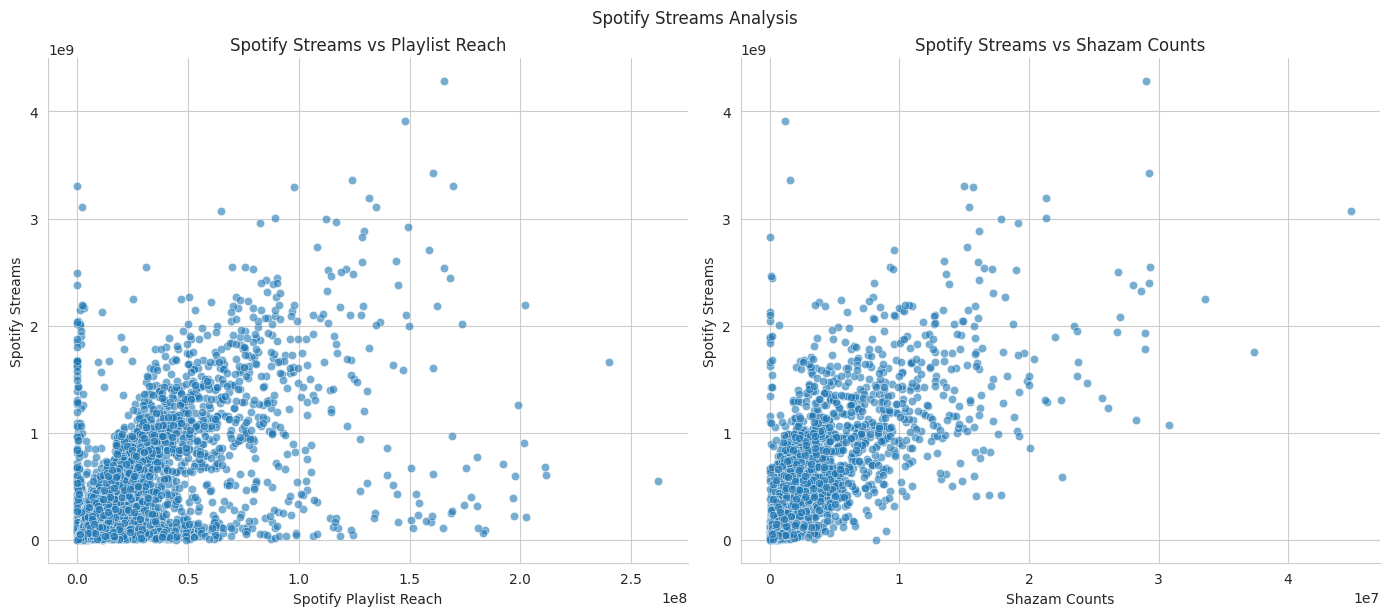

In [4]:
def plot_scatter_with_regression(x: str, y: str, data: pd.DataFrame, title: str, xlabel: str, ylabel: str) -> None:
    sns.scatterplot(x=x, y=y, data=data, alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.despine()

def plot_spotify_analysis(data: pd.DataFrame) -> None:
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plot_scatter_with_regression(
        x='Spotify Playlist Reach',
        y='Spotify Streams',
        data=data,
        title='Spotify Streams vs Playlist Reach',
        xlabel='Spotify Playlist Reach',
        ylabel='Spotify Streams'
    )

    plt.subplot(1, 2, 2)
    plot_scatter_with_regression(
        x='Shazam Counts',
        y='Spotify Streams',
        data=data,
        title='Spotify Streams vs Shazam Counts',
        xlabel='Shazam Counts',
        ylabel='Spotify Streams'
    )

    plt.tight_layout()
    plt.suptitle('Spotify Streams Analysis', y=1.02)
    plt.show()

# Assuming df is your DataFrame
plot_spotify_analysis(df)

                            OLS Regression Results                            
Dep. Variable:        Spotify Streams   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4655.
Date:                Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:37:11   Log-Likelihood:                -83738.
No. Observations:                3972   AIC:                         1.675e+05
Df Residuals:                    3970   BIC:                         1.675e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.076e+08   6.42e+06     32.342

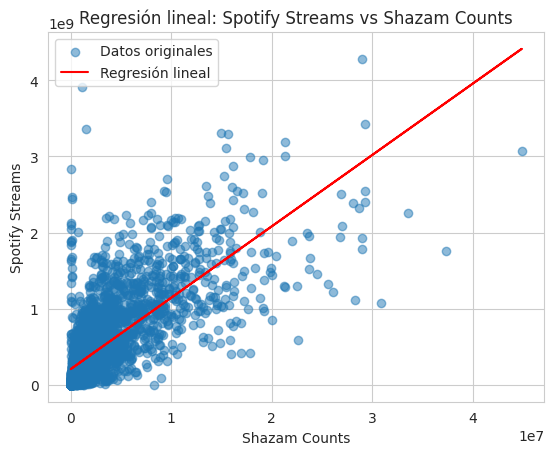

In [5]:
def clean_data(data, columns) -> pd.DataFrame:
    return data[columns].dropna()

def fit_linear_regression(X, Y) -> sm.regression.linear_model.RegressionResultsWrapper:
    X = sm.add_constant(X)
    return sm.OLS(Y, X).fit()

def plot_regression(X, Y, predictions, xlabel, ylabel, title) -> None:
    plt.scatter(X, Y, label='Datos originales', alpha=0.5)
    plt.plot(X, predictions, color='red', label='Regresión lineal')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# Limpiar los datos
spotify_data_clean = clean_data(df, ['Spotify Streams', 'Shazam Counts'])

# Definir X (Shazam Counts) y Y (Spotify Streams)
X = spotify_data_clean['Shazam Counts']
Y = spotify_data_clean['Spotify Streams']

# Ajustar el modelo de regresión lineal
model = fit_linear_regression(X, Y)

# Mostrar el resumen del modelo
print(model.summary())

# Predecir los valores
predictions = model.predict(sm.add_constant(X))

# Graficar los datos y la línea de regresión
plot_regression(
    X=X,
    Y=Y,
    predictions=predictions,
    xlabel='Shazam Counts',
    ylabel='Spotify Streams',
    title='Regresión lineal: Spotify Streams vs Shazam Counts'
)

In [6]:
# Definir X (Shazam Counts) y Y (Spotify Streams)
X = spotify_data_clean['Shazam Counts']
Y = spotify_data_clean['Spotify Streams']

In [7]:
# Cálculo manual de métricas
def calculo_metricas(Y, predictions):
    # Calcular la media de Y
    Y_mean = np.mean(Y)
    # Calcular SST (Suma total al cuadrado)
    SST = np.sum((Y - Y_mean) ** 2)
    # Calcular RSS (Suma de residuos al cuadrado)
    RSS = np.sum((Y - predictions) ** 2)
    # Paso 4: Calcular R^2
    R_squared = 1 - (RSS / SST)
    return SST, RSS, R_squared

SST, RSS, R_squared = calculo_metricas(Y, predictions)

print("SST:", SST)
print("RSS:", RSS)
print("R^2:", R_squared)

SST: 1.0354723820969028e+21
RSS: 4.7660796018403384e+20
R^2: 0.5397192929290205


In [8]:
# Cálculo manual de los coeficientes
def calculo_coef(X, Y):
    # Número de observaciones
    n = len(X)
    # Sumas necesarias
    sum_X = X.sum()
    sum_Y = Y.sum()
    sum_XY = (X * Y).sum()
    sum_X_squared = (X ** 2).sum()
    # Cálculo de beta1 (pendiente)
    beta1 = (n * sum_XY - sum_X * sum_Y) / (n * sum_X_squared - sum_X**2)
    # Cálculo de beta0 (intercepto)
    mean_X = sum_X / n
    mean_Y = sum_Y / n
    beta0 = mean_Y - beta1 * mean_X
    return beta0, beta1

beta0, beta1 = calculo_coef(X, Y)

print("Coeficiente beta1 (pendiente):", beta1)
print("Coeficiente beta0 (intercepto):", beta0)

Coeficiente beta1 (pendiente): 93.76184210509393
Coeficiente beta0 (intercepto): 207633648.27422264


- 1. R-squared (R-cuadrado): 0.540
Interpretación: El valor de R-cuadrado indica qué porcentaje de la variación en la variable dependiente (Spotify Streams) puede explicarse por la variable independiente (Shazam Counts). En este caso, un valor de 0.540 significa que el 54% de la variación en las reproducciones de Spotify puede explicarse por las búsquedas en Shazam. Es un valor moderado, lo que sugiere que hay una relación importante entre ambas variables, aunque no es perfecta.
- 2. Coeficiente de Shazam Counts: 93.7618
Interpretación: Este coeficiente indica que, en promedio, por cada búsqueda adicional en Shazam, se asocian aproximadamente 93.76 reproducciones adicionales en Spotify. Es decir, la relación es positiva, y un aumento en las búsquedas en Shazam lleva a un aumento en las reproducciones en Spotify.
- 3. P-valor de Shazam Counts: 0.000
Interpretación: El p-valor es prácticamente cero, lo que significa que la relación entre las búsquedas en Shazam y las reproducciones de Spotify es estadísticamente significativa. En otras palabras, es muy poco probable que esta relación ocurra por azar.
- 4. Intercepto (const): 2.076e+08
Interpretación: El valor del intercepto (207,600,000) representa el valor estimado de las reproducciones de Spotify cuando las búsquedas en Shazam son cero. Este valor es bastante alto, lo que indica que incluso sin búsquedas en Shazam, se esperarían en promedio 207 millones de reproducciones de Spotify para las canciones de este conjunto de datos.
- 5. F-statistic: 4655
Interpretación: El estadístico F es utilizado para evaluar la hipótesis de que el modelo tiene valor predictivo. Simplificando  es la razón entre la variación explicada por el modelo y la variación no explicada. Un valor alto como este, junto con un p-valor asociado de 0.000, indica que el modelo en su conjunto es altamente significativo.
- 6. Cond. No. (Número de condición): 5.46e+06
Interpretación: El número de condición es una medida de posibles problemas de multicolinealidad. Un valor alto (como este) puede indicar problemas de escala o colinealidad entre variables. En este caso, dado que es un modelo de regresión simple (con solo una variable independiente), esto podría estar relacionado con la escala de los datos.

### Mejorando la regresion con una transformación logaritmica

Se aplica la transformación $\log_{10}{(x+1)}$, donde su transformación inversa es $10^x-1$.

                             OLS Regression Results                            
Dep. Variable:     Spotify Streams Log   R-squared:                       0.686
Model:                             OLS   Adj. R-squared:                  0.686
Method:                  Least Squares   F-statistic:                     8682.
Date:                 Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                         02:37:13   Log-Likelihood:                -2718.3
No. Observations:                 3972   AIC:                             5441.
Df Residuals:                     3970   BIC:                             5453.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.5047

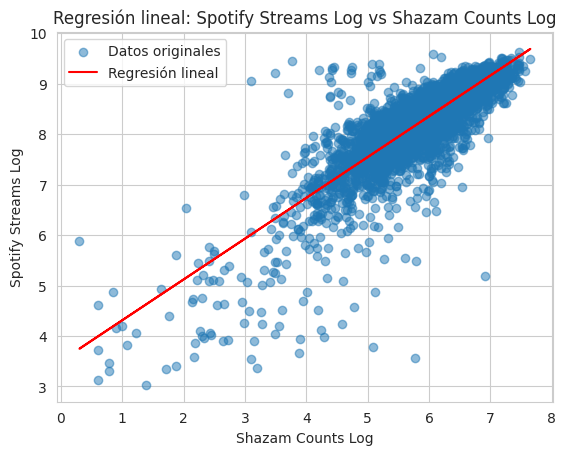

In [9]:
spotify_data_clean_log = spotify_data_clean.copy()
spotify_data_clean_log['Shazam Counts Log'] = spotify_data_clean_log['Shazam Counts'].apply(lambda x: np.log10(x+1))
spotify_data_clean_log['Spotify Streams Log'] = spotify_data_clean_log['Spotify Streams'].apply(lambda x: np.log10(x+1))
spotify_data_clean_log = spotify_data_clean_log[['Shazam Counts Log', 'Spotify Streams Log']]

# Definir X (Shazam Counts) y Y (Spotify Streams)
X = spotify_data_clean_log['Shazam Counts Log']
Y = spotify_data_clean_log['Spotify Streams Log']

# Ajustar el modelo de regresión lineal
model_log = fit_linear_regression(X, Y)

# Mostrar el resumen del modelo
print(model_log.summary())

# Predecir los valores
predictions = model_log.predict(sm.add_constant(X))

# Graficar los datos y la línea de regresión
plot_regression(
    X=X,
    Y=Y,
    predictions=predictions,
    xlabel='Shazam Counts Log',
    ylabel='Spotify Streams Log',
    title='Regresión lineal: Spotify Streams Log vs Shazam Counts Log'
)

In [10]:
SST, RSS, R_squared = calculo_metricas(Y, predictions)
print("SST:", SST)
print("RSS:", RSS)
print("R^2:", R_squared)

SST: 2912.9348787590543
RSS: 914.0502713399505
R^2: 0.6862098504140446


In [11]:
beta0, beta1 = calculo_coef(X, Y)
print("Coeficiente beta1 (pendiente):", beta1)
print("Coeficiente beta0 (intercepto):", beta0)
print("Transformación inversa beta0:", 10**beta0 - 1)

Coeficiente beta1 (pendiente): 0.8082209032806918
Coeficiente beta0 (intercepto): 3.504703249458644
Transformación inversa beta0: 3195.7100724582033


- 1. R-squared (R-cuadrado): 0.686
Interpretación: El valor de R-cuadrado indica qué porcentaje de la variación en la variable dependiente (Spotify Streams Log) puede explicarse por la variable independiente (Shazam Counts Log). En este caso, un valor de 0.686 significa que el 69% de la variación en el logaritmo de las reproducciones de Spotify puede explicarse por el logaritmo de las búsquedas en Shazam. Es un valor moderado, lo que sugiere que hay una relación importante entre ambas variables, aunque no es perfecta.
- 2. Coeficiente de Shazam Counts: 0.808
Interpretación: Este coeficiente indica que, en promedio, por cada incremento de un 1% adicional de busquedas en Shazam, se asocia aproximadamente un incremento en 0.808% de reproducciones adicionales en Spotify. Es decir, la relación es positiva, y un aumento en las búsquedas en Shazam lleva a un aumento en las reproducciones en Spotify.
- 3. P-valor de Shazam Counts: 0.000
Interpretación: El p-valor es prácticamente cero, lo que significa que la relación entre los logaritmos de las búsquedas en Shazam y los logaritmos de las reproducciones de Spotify es estadísticamente significativa. En otras palabras, es muy poco probable que esta relación ocurra por azar.
- 4. Intercepto (const): 3.504
Interpretación: El valor del intercepto (3.504) representa el valor estimado del logaritmo de las reproducciones de Spotify cuando las búsquedas en Shazam son cero. Al invertir la transformación tenemos que el valor estimado de las reproducciones de Spotify son alrededor de 3196 cuando las busquedas en Shazam son 0.
- 5. F-statistic: 8682
Interpretación: Un valor alto como este, junto con un p-valor asociado de 0.000, indica que el modelo en su conjunto es altamente significativo.
- 6. Cond. No. (Número de condición): 40.8
Interpretación: El número de condición es una medida de posibles problemas de multicolinealidad. Baja considerablemente respecto de la pprimera versión, aunque ún es un poco alta.

### Para la Presentacion

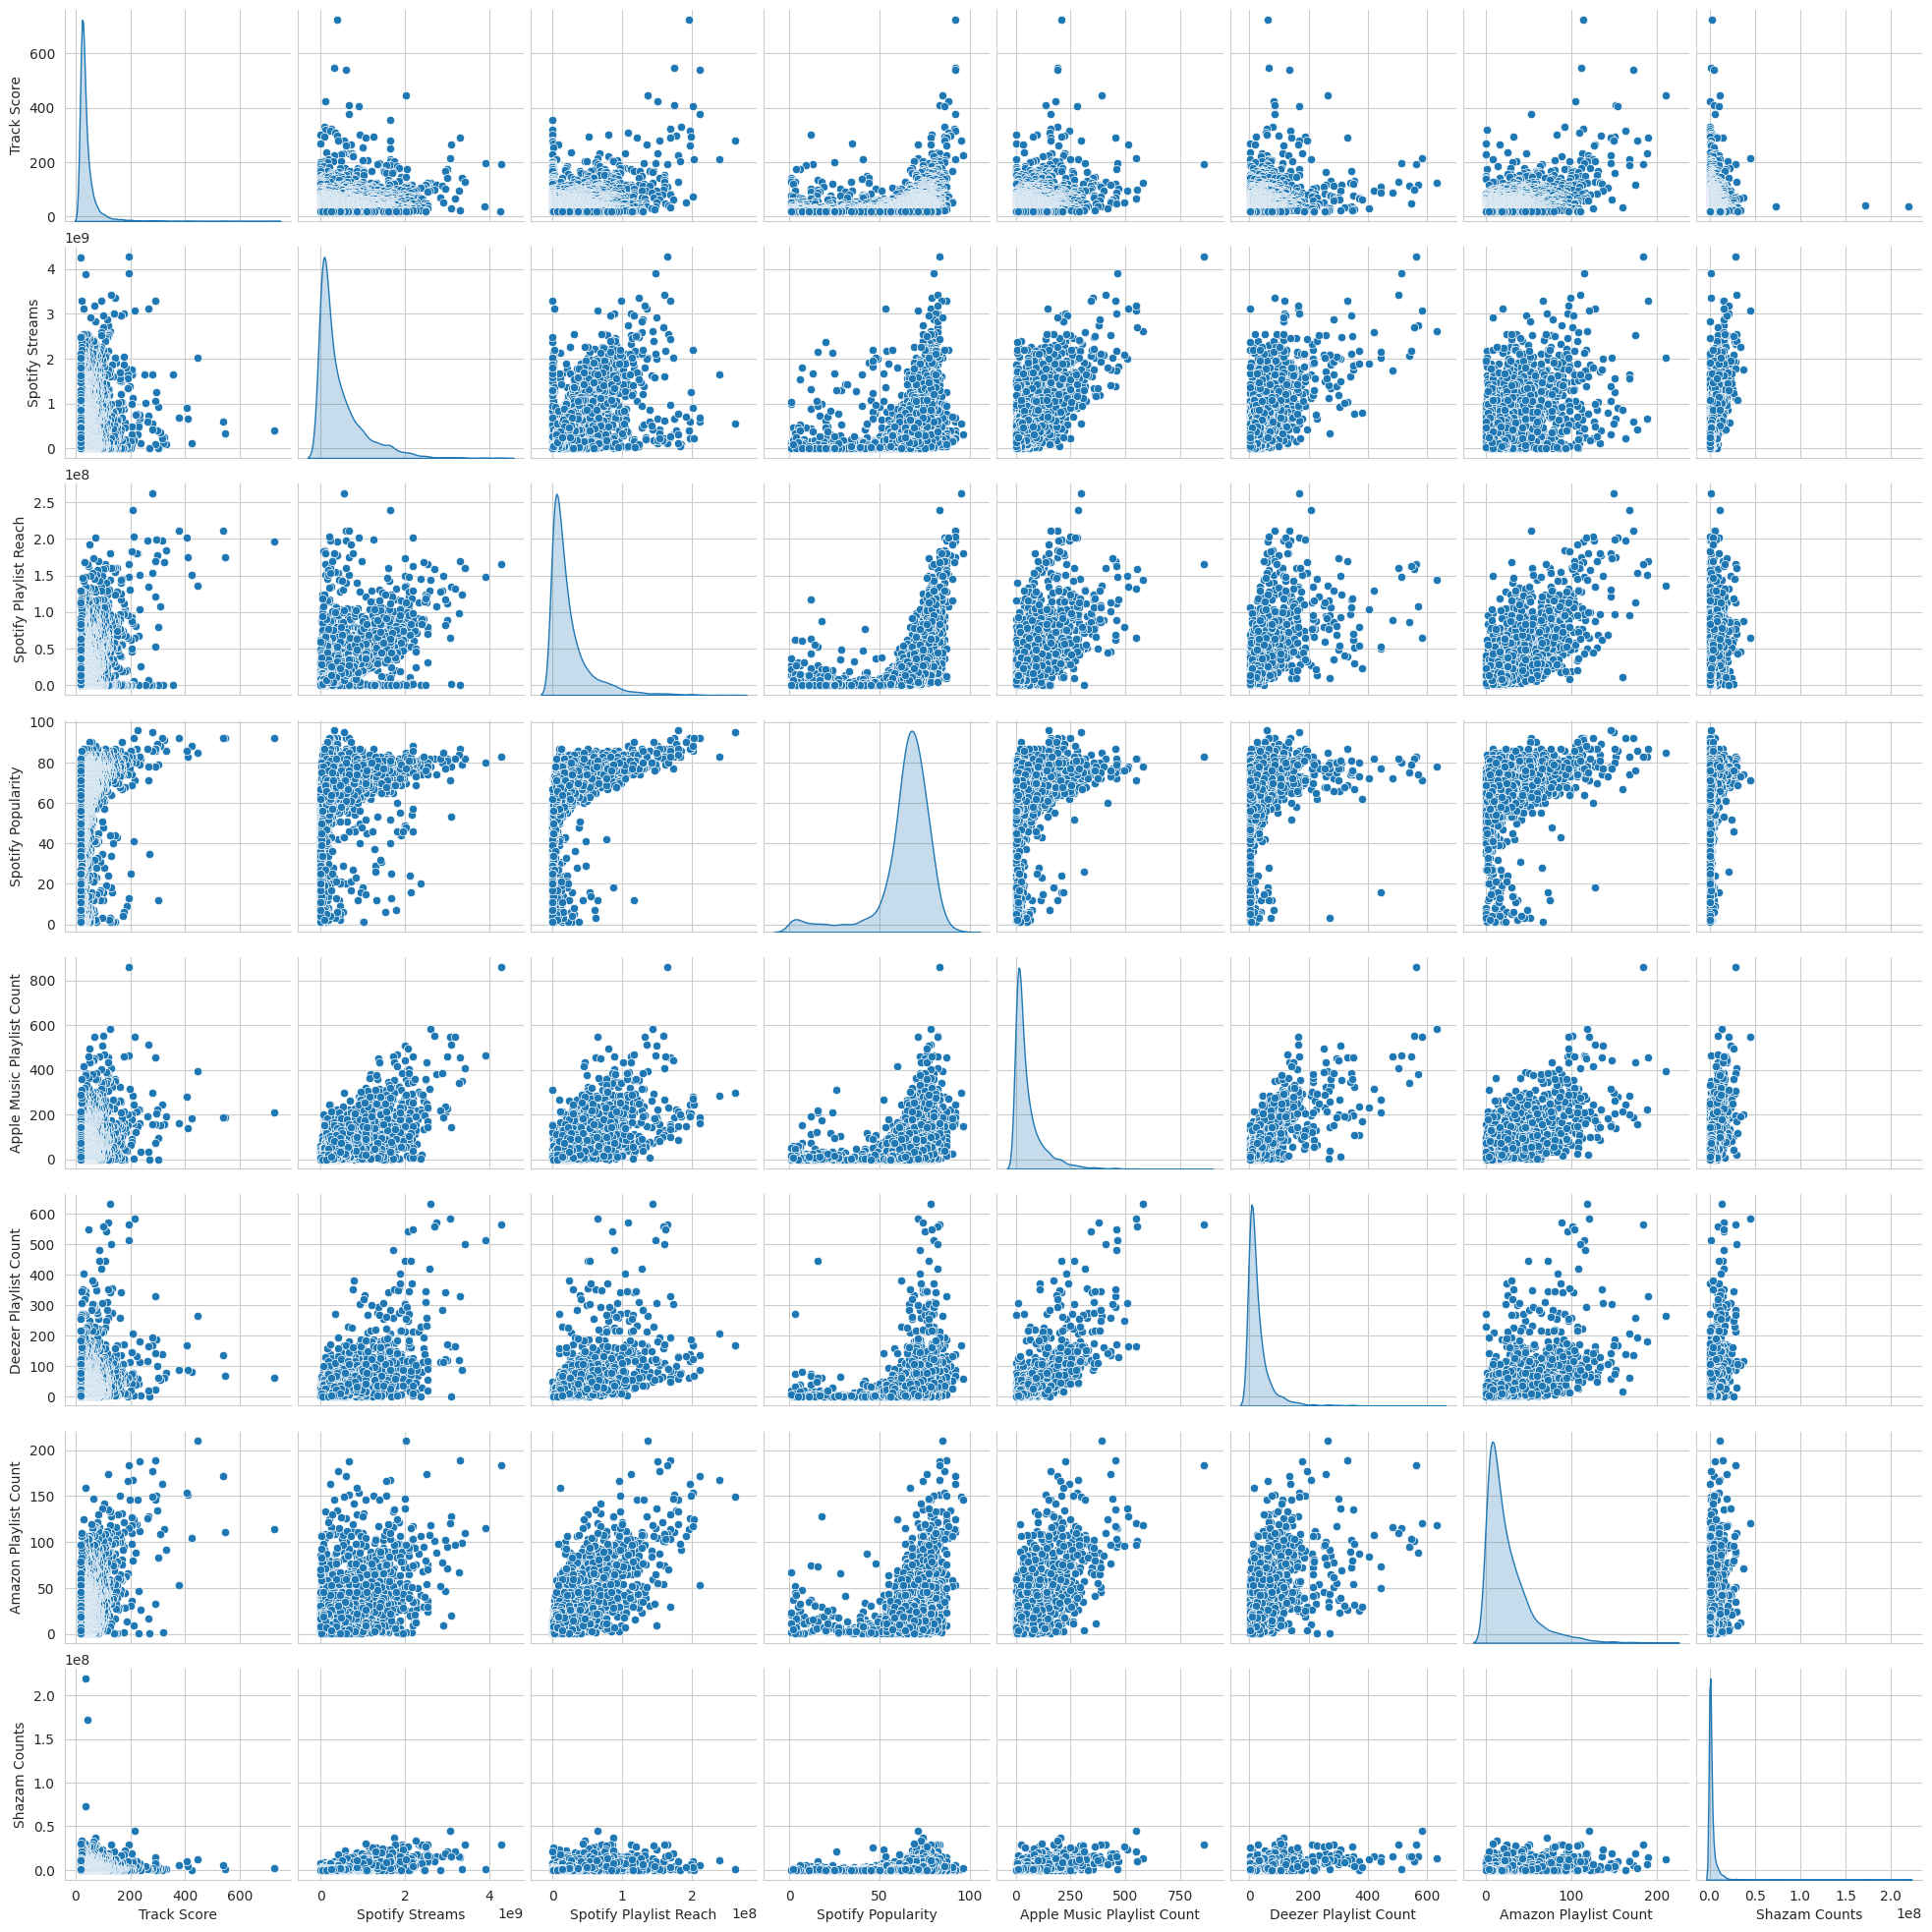

In [12]:
sns.pairplot(data=df.drop(columns=[ 'TIDAL Popularity', 'Explicit Track']),diag_kind='kde')
plt.show()

In [13]:
# Correlación entre 'Shazam Counts' y 'Spotify Streams'
print(spotify_data_clean['Shazam Counts'].corr(spotify_data_clean['Spotify Streams']))

0.7346559010373636


In [14]:
# Correlación entre 'Shazam Counts Log' y 'Spotify Streams Log'
print(spotify_data_clean_log['Shazam Counts Log'].corr(spotify_data_clean_log['Spotify Streams Log']))

0.8283778427831375
